In [ ]:
import pandas as pd
import numpy as np
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
!pip install mlxtend
#from mlxtend.evaluate import bias_variance_decomp

In [ ]:
# Link to the data set
link = 'https://archive-beta.ics.uci.edu/ml/datasets/grammatical%2Bfacial%2Bexpressions'

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')
os.chdir('C:\\Users\\visha\\Desktop\\Data Mining\\Facial Expression Analysis')

In [ ]:
# os.chdir('/content/gdrive/MyDrive/gce/grammatical_facial_expression')
os.chdir(str(os.getcwd())+'\\data')

In [ ]:
files = os.listdir()
files = list(filter(lambda x: x.endswith('.txt'),files))

In [ ]:
# Treating all rows with 1st per file
files_list = ['yn_question',
 'wh_question', # me
 'doubt_question', # me
 'negative', # me
 'conditional',
 'relative',
 'affirmative',
 'topics',
 'emphasis']

In [ ]:
# # Only for 0's
# def load_files():
#     subjects = ['a','b']
    
#     for filename in files_list:
#         for subject in subjects:
#             # Read data from each file
#             filename_datapoint = subject+'_'+filename+'_'+'datapoints.txt'
#             df = pd.read_csv(filename_datapoint,sep=' ')
            
#             #Reading target file
#             filename_target = subject+'_'+filename+'_'+'targets.txt'
            
#             df = pd.concat([df,pd.read_csv(filename_target,names =['Target'])],axis=1)

#             df['Facial_Expression'] = filename
#             yield df

In [ ]:
# def read_data(data_files):
    
#     # Generate a list of file names
#     data = [x for x in data_files]
    
#     # Concatenate data frames
#     final_df = pd.concat(load_files(data))
    
#     return final_df

In [ ]:
# df_0 = read_data(files_list)

In [ ]:
def df_returner(i):
    filename_datapoint1 = 'a'+'_'+files_list[i]+'_'+'datapoints.txt'

    #Reading target file
    filename_target1 = 'a'+'_'+files_list[i]+'_'+'targets.txt'

    subject = 'b'
    filename_datapoint2 = 'b'+'_'+files_list[i]+'_'+'datapoints.txt'

    #Reading target file
    filename_target2 = 'b'+'_'+files_list[i]+'_'+'targets.txt'

    df1 = pd.concat([pd.read_csv(filename_datapoint1,sep=' ')
                    ,pd.read_csv(filename_datapoint2,sep=' ')],axis=0)
    df2 = pd.concat([pd.read_csv(filename_target1,names =['Target'])
                    ,pd.read_csv(filename_target2,names =['Target'])],axis=0)

    df = pd.concat([df1,df2],axis=1)
    df.drop(columns='0.0',inplace=True)
    return df

def outlier_treatment(df_ot):
    lcn = df_ot.columns.tolist()
    
    for i in range(len(lcn)):
        ul= df_ot[lcn[i]].quantile(0.75)+(1.5*(df_ot[lcn[i]].quantile(0.75)-df_ot[lcn[i]].quantile(0.25)))
        ll= df_ot[lcn[i]].quantile(0.25)-(1.5*(df_ot[lcn[i]].quantile(0.75)-df_ot[lcn[i]].quantile(0.25)))
        m = df_ot[lcn[i]].mean()
        df_ot.loc[df_ot[lcn[i]]<ll, lcn[i]] = m
        df_ot.loc[df_ot[lcn[i]]>ul, lcn[i]] = m
        
    return df_ot
    
    
def medianTreatment(df_t,file_name):

    myseries1 = df_t.quantile(0.25) == 0
    list1 = myseries1[myseries1].index.tolist()

    myseries2 = df_t.quantile(0.50) == 0
    list2 = myseries2[myseries2].index.tolist()
    
    for i in range(0,len(list1)):
        str1 = list1[i]
        df_t[str1] = df_t[str1].astype(int)
        df_t.loc[df_t[str1]==0,str1] = df_t[str1].median()
        
    for i in range(0,len(list2)):
        str2 = list2[i]                                  
        df_t.loc[df_t[str2]==0,str2] = df_t[str2].mean()*2
        
    df_t = outlier_treatment(df_t)
    if file_name == None:
        return df_t
    else:
        df_t['GFE'] = file_name
        return df_t

df_0 = pd.DataFrame()
df_1 = pd.DataFrame()

for i in range(0,len(files_list)):
    tdf = df_returner(i)
    df_0 = pd.concat([df_0,tdf[tdf['Target']==0]],axis=0)
    tdf = tdf[tdf['Target'] == 1]
    tdf.drop(columns='Target',inplace=True)
    df_1 = pd.concat([df_1,medianTreatment(tdf,files_list[i])],axis=0)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [ ]:
df_0 = medianTreatment(df_0.drop(columns='Target'),None)
df_0

,0x,0y,0z,1x,1y,1z,2x,2y,2z,3x,...,96z,97x,97y,97z,98x,98y,98z,99x,99y,99z
0,300.721,167.023,1129.388394,296.513,163.451,1160.519076,290.855,162.296,1203.751315,285.416,...,1254.5863,347.702,200.727269,1260.599424,356.959,202.7907,1226.429094,361.118,156.636,1133.934492
1,300.365,191.744,1129.388394,296.690,188.839,1160.519076,291.964,187.925,1203.751315,287.397,...,1254.5863,340.904,171.414000,1260.599424,348.662,176.3600,1226.429094,352.286,181.745,1133.934492
2,299.563,190.467,1129.388394,296.034,187.823,1160.519076,291.563,186.997,1203.751315,287.204,...,1254.5863,337.700,170.638000,1260.599424,345.003,175.3090,1226.429094,348.483,180.387,1133.934492
3,299.579,189.233,1129.388394,296.187,186.672,1160.519076,291.868,185.879,1203.751315,287.669,...,1254.5863,336.324,170.687000,1260.599424,343.347,175.2770,1226.429094,346.643,180.233,1133.934492
4,299.552,189.105,1129.388394,296.200,186.580,1160.519076,291.911,185.802,1203.751315,287.739,...,1254.5863,335.806,170.870000,1260.599424,342.780,175.5180,1226.429094,346.011,180.480,1133.934492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,315.791,228.049,1265.000000,313.581,226.542,1270.000000,311.030,226.215,1275.000000,308.693,...,1289.0000,336.889,213.387000,1294.000000,341.797,214.3920,1304.000000,345.481,216.362,1299.000000
1340,316.470,227.976,1270.000000,314.216,226.485,1261.000000,311.611,226.156,1275.000000,309.194,...,1289.0000,338.619,213.361000,1294.000000,343.614,214.5200,1299.000000,347.271,216.616,1304.000000
1341,316.450,227.989,1275.000000,314.193,226.494,1270.000000,311.583,226.162,1280.000000,309.161,...,1289.0000,338.648,213.362000,1294.000000,343.651,214.5260,1299.000000,347.313,216.628,1304.000000
1342,319.490,229.207,1299.000000,316.919,227.713,1294.000000,313.741,227.748,1314.000000,311.291,...,1314.0000,339.725,213.814000,1319.000000,345.488,215.1590,1329.000000,349.676,217.373,1329.000000


In [ ]:
# Staging data for performing EDA
i = 1
filename_datapoint1 = 'a'+'_'+files_list[i]+'_'+'datapoints.txt'

#Reading target file
filename_target1 = 'a'+'_'+files_list[i]+'_'+'targets.txt'

subject = 'b'
filename_datapoint2 = 'b'+'_'+files_list[i]+'_'+'datapoints.txt'

#Reading target file
filename_target2 = 'b'+'_'+files_list[i]+'_'+'targets.txt'

df1 = pd.concat([pd.read_csv(filename_datapoint1,sep=' ')
                ,pd.read_csv(filename_datapoint2,sep=' ')],axis=0)
df2 = pd.concat([pd.read_csv(filename_target1,names =['Target'])
                ,pd.read_csv(filename_target2,names =['Target'])],axis=0)

tdf = pd.concat([df1,df2],axis=1)
tdf.drop(columns = '0.0')

,0x,0y,0z,1x,1y,1z,2x,2y,2z,3x,...,97x,97y,97z,98x,98y,98z,99x,99y,99z,Target
0,314.716,197.414,832,310.597,193.796,836,305.001,192.567,859,299.614,...,361.003,177.619,902,370.156,183.444,0,374.224,189.670,0,0
1,317.110,192.618,1004,313.717,189.991,1004,309.262,189.179,1016,304.961,...,354.583,176.118,1050,361.676,180.652,1066,364.880,185.522,1063,0
2,315.222,193.050,1073,311.917,190.639,1079,307.607,189.958,1083,303.479,...,350.356,176.773,1118,357.260,180.681,1136,360.634,185.058,0,0
3,314.687,193.558,1097,311.484,191.172,1100,307.316,190.482,1104,303.329,...,348.308,177.482,1136,355.008,181.410,1151,358.297,185.777,1155,0
4,313.091,195.236,1129,309.976,192.918,1133,305.929,192.272,1140,302.078,...,345.435,179.506,1171,351.985,183.299,1183,355.220,187.548,1191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,322.378,226.875,1261,319.917,225.127,1270,316.654,224.661,1275,313.647,...,345.852,213.784,1289,350.953,214.433,1289,354.830,216.093,1294,0
1324,322.371,226.869,1265,319.910,225.120,1270,316.647,224.653,1275,313.640,...,345.852,213.788,1284,350.953,214.439,1294,354.830,216.101,1299,0
1325,322.365,226.871,1265,319.902,225.120,1270,316.636,224.652,1275,313.626,...,345.867,213.780,1289,350.972,214.432,1289,354.852,216.096,1294,0
1326,322.372,226.852,1261,319.911,225.099,1270,316.645,224.629,1275,313.635,...,345.882,213.777,1289,350.987,214.432,1294,354.866,216.098,1294,0


In [ ]:
# EDA -- after df_1.columns 
t = list(tdf.iloc[-4,1:-1])
lx,ly,lz=[],[],[]
for i in range(0,len(t),3):
    lx.append(t[i])
    ly.append(t[i+1])
    lz.append(t[i+2])
temp = pd.DataFrame({'x':lx,'y':ly,'z':lz})

In [ ]:
import plotly.express as px
fig = px.scatter_3d(temp, x='x', y='y', z='z')
fig.show()

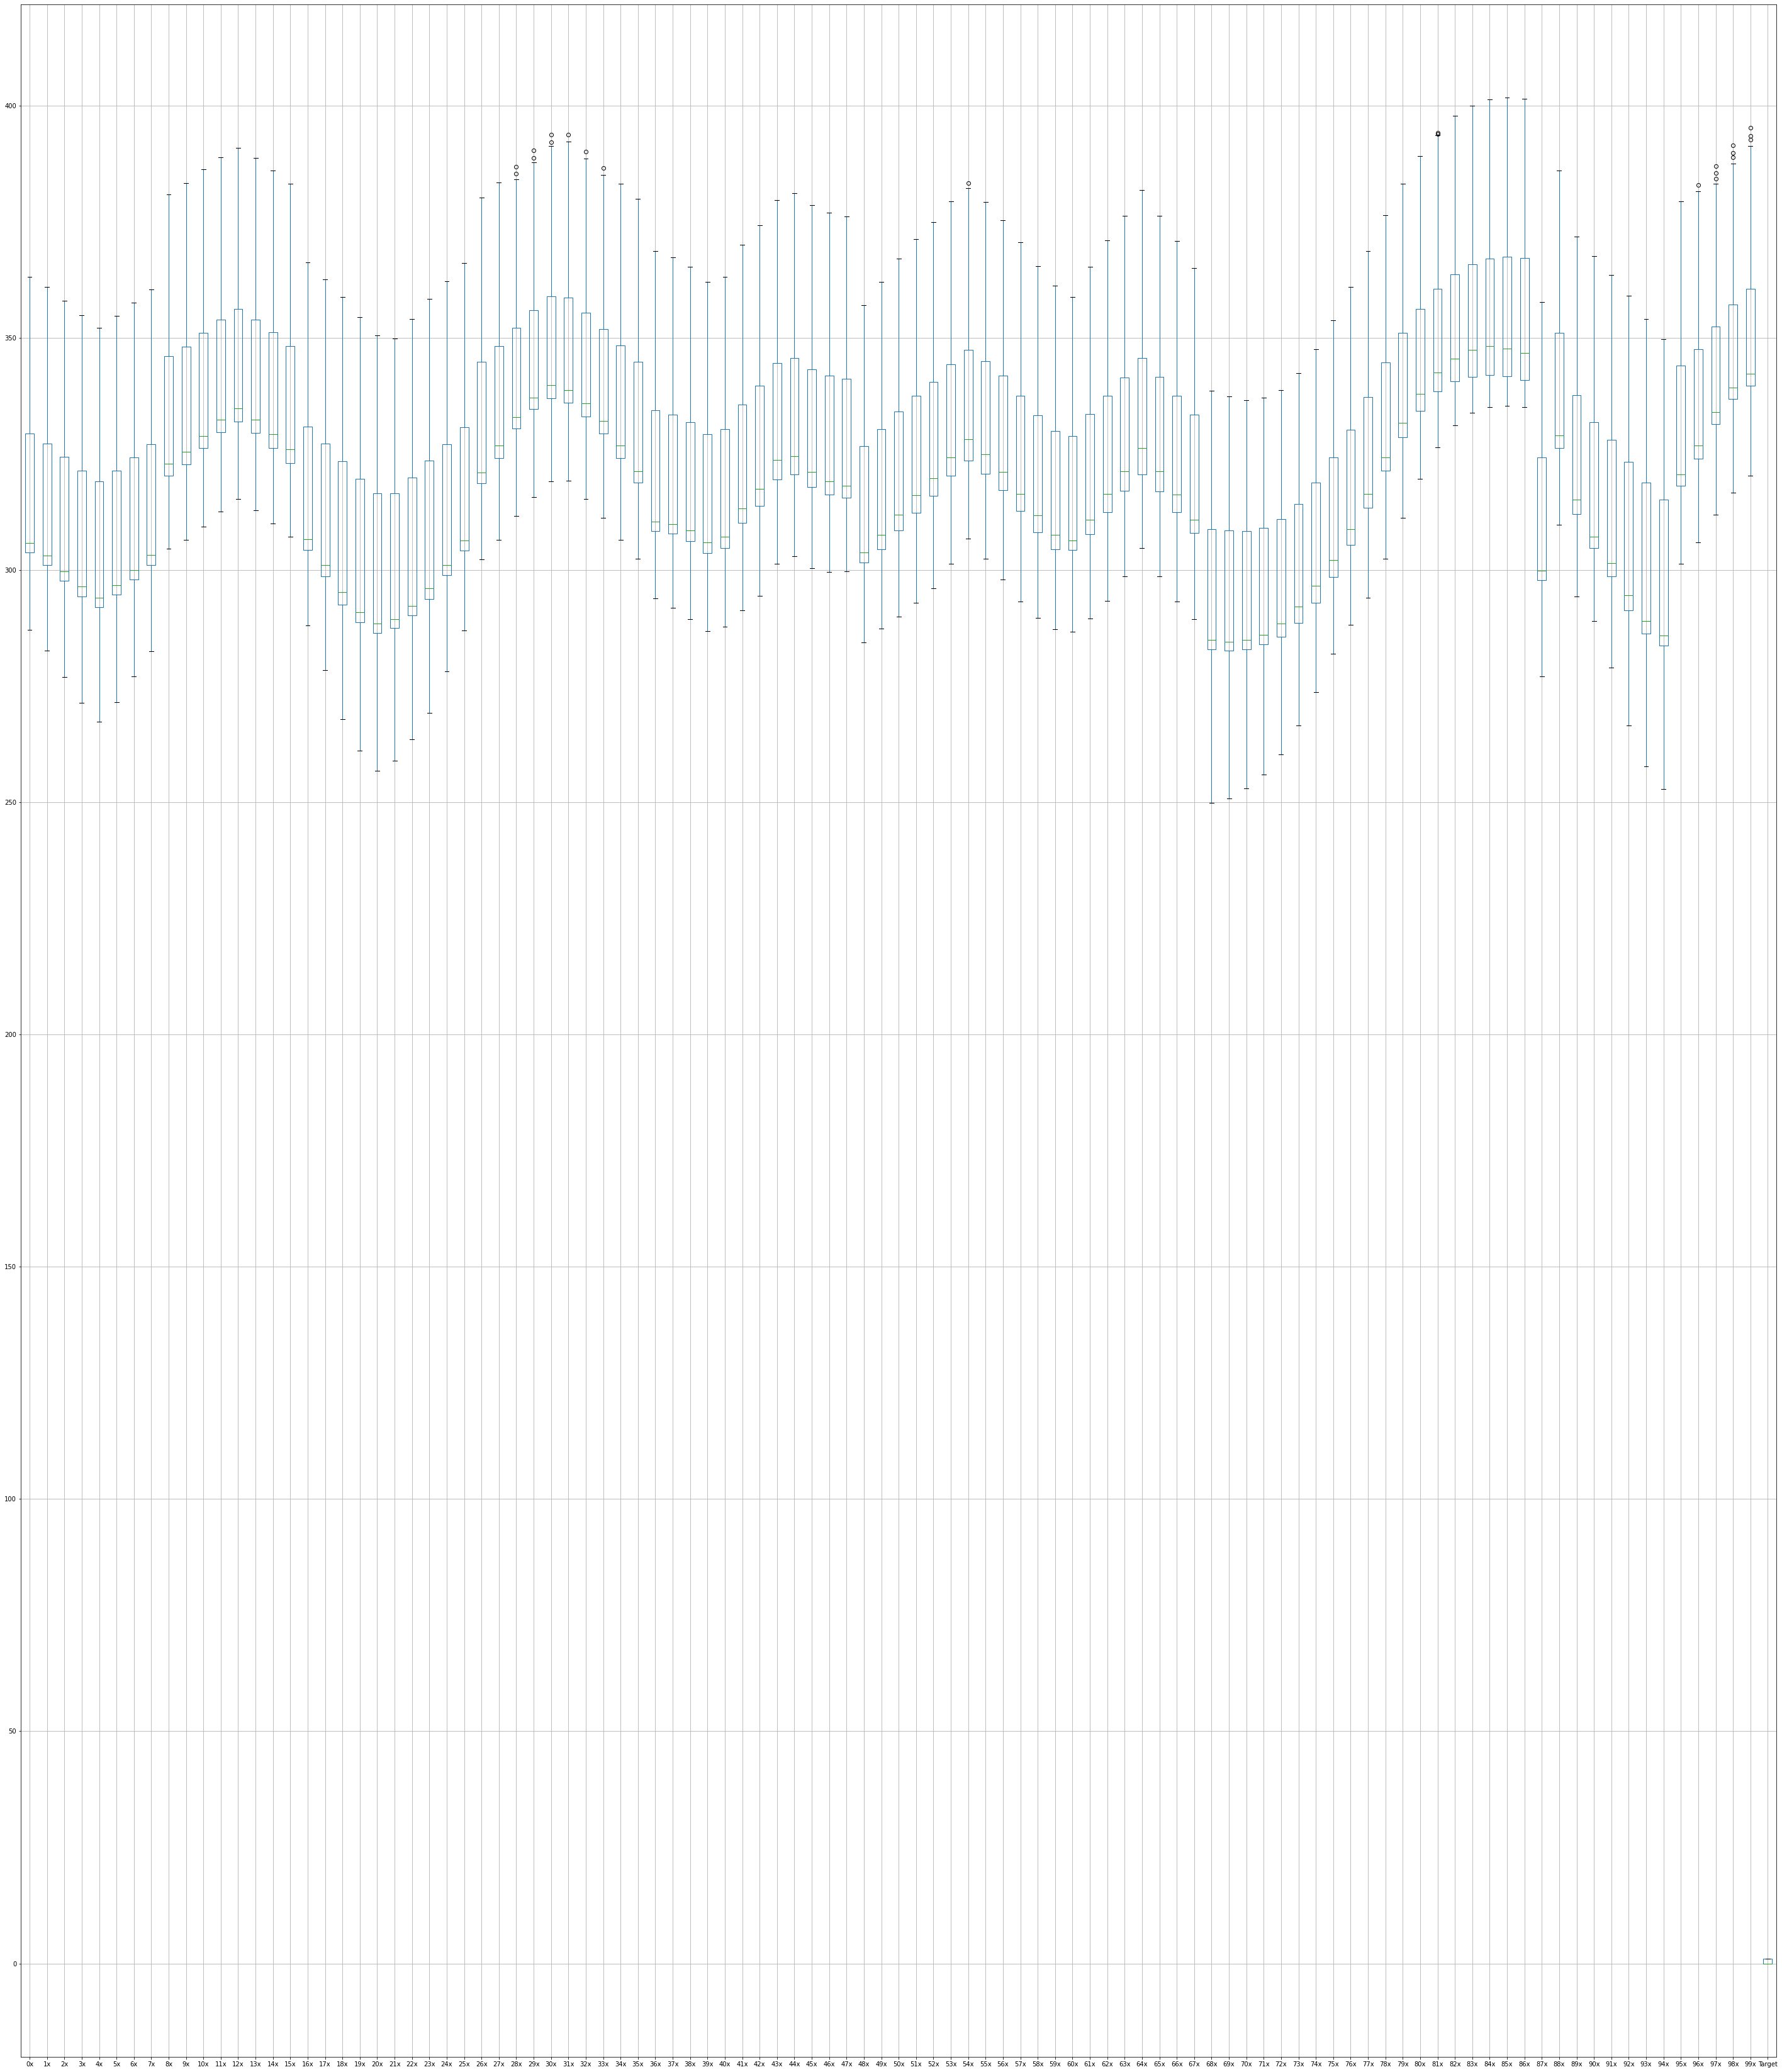

In [ ]:
tdf.iloc[:,1::3].boxplot(figsize=(50,60))
plt.show()

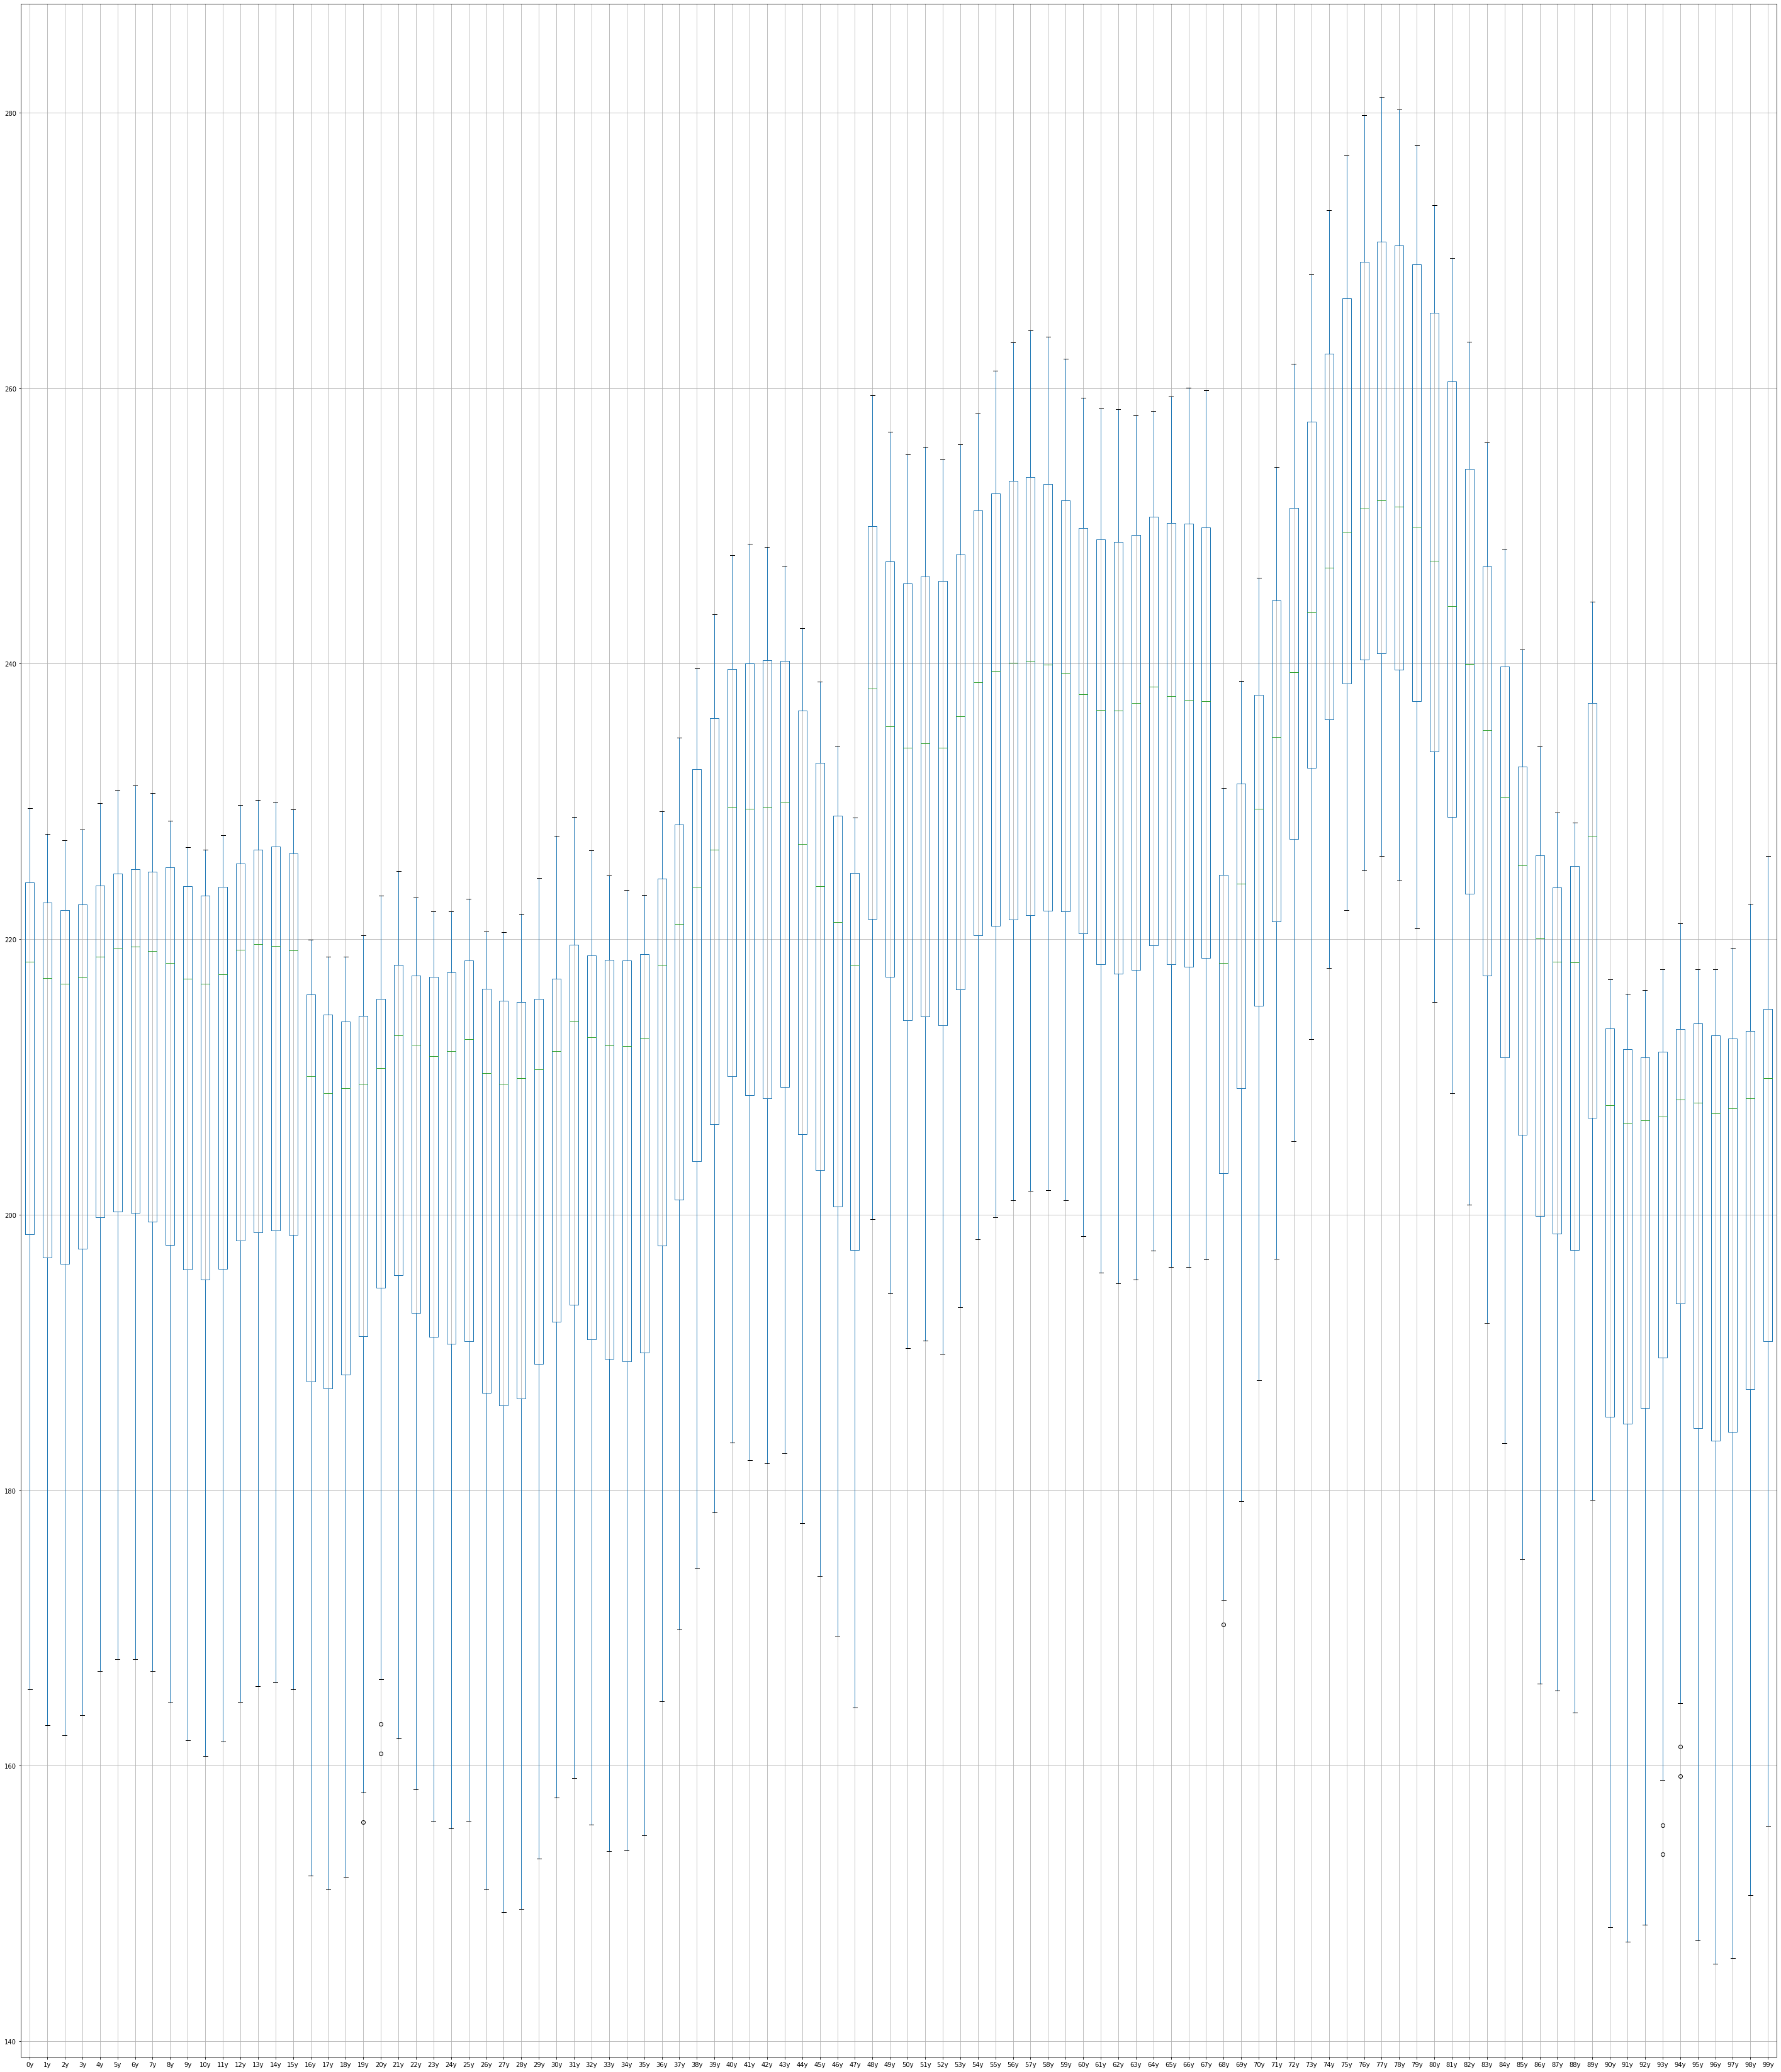

In [ ]:
tdf.iloc[:,2::3].boxplot(figsize=(50,60))
plt.show()

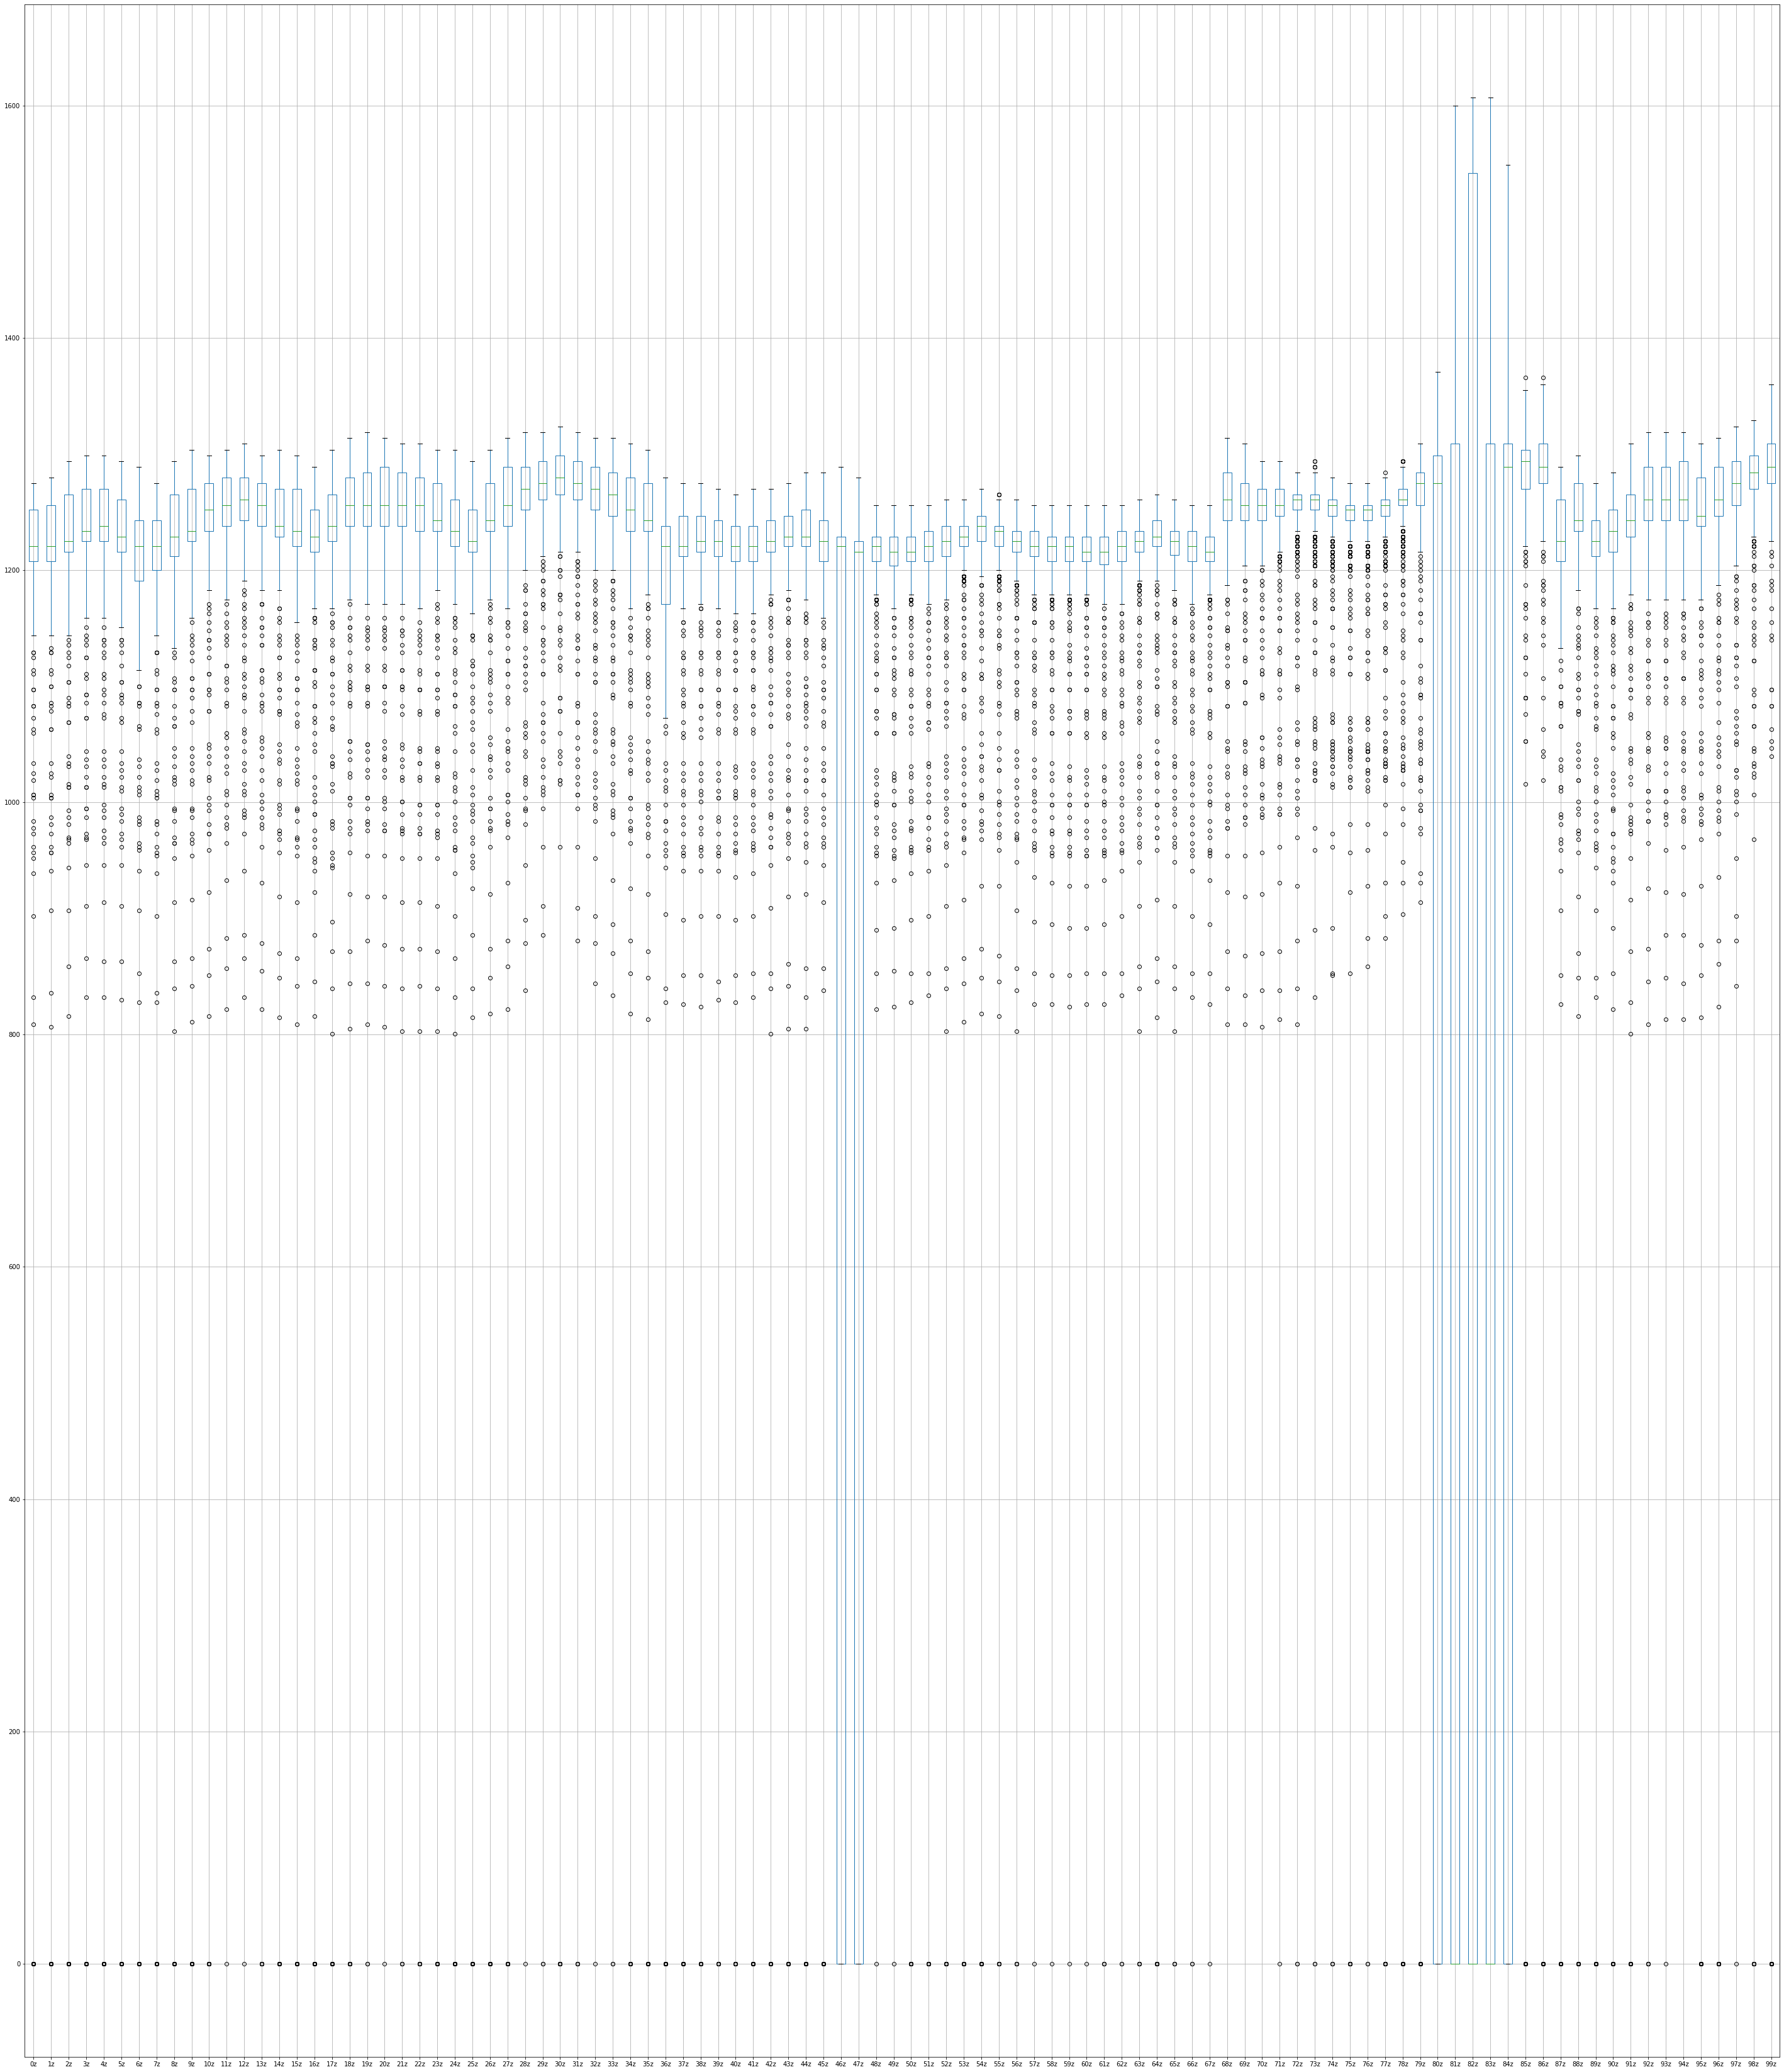

In [ ]:
tdf.iloc[:,3::3].boxplot(figsize=(50,60))
plt.show()

In [ ]:
from sklearn import preprocessing
import numpy as np

X_train1=df_1.drop(columns=['GFE'])
X_train0=df_0

def stdX(X_train):
    scaler = preprocessing.StandardScaler().fit(X_train)
    scaler.mean_
    scaler.scale_
    X_scaled=scaler.fit_transform(X_train)
    X_scaled = pd.DataFrame(X_scaled, columns = X_train1.columns)
    return X_scaled

X_scale1= stdX(X_train1)
X_scale0= stdX(X_train0)

In [ ]:
X_scale1

,0x,0y,0z,1x,1y,1z,2x,2y,2z,3x,...,96z,97x,97y,97z,98x,98y,98z,99x,99y,99z
0,-0.459681,-1.419443,0.286532,-0.472308,-1.423189,0.354516,-0.483929,-1.411865,0.269333,-0.493446,...,0.223691,-0.328936,-1.470244,0.292345,-0.313341,-1.475261,0.472009,-0.342961,-1.467760,0.244740
1,-0.450302,-1.460319,0.401347,-0.463940,-1.466669,0.354516,-0.473710,-1.457300,0.269333,-0.485263,...,0.363331,-0.269799,-1.600185,0.292345,-0.252894,-1.590944,0.697950,-0.292991,-1.567339,0.298092
2,-0.436307,-1.483843,0.401347,-0.450610,-1.494058,0.354516,-0.459815,-1.488089,0.269333,-0.472695,...,0.363331,-0.226710,-1.683207,0.424045,-0.208007,-1.656223,0.901298,-0.256124,-1.616963,0.394127
3,-0.433776,-1.503389,0.401347,-0.446907,-1.512820,0.354516,-0.455331,-1.506549,0.269333,-0.468238,...,0.363331,-0.212668,-1.720951,0.424045,-0.195869,-1.695311,0.810921,-0.247497,-1.657520,-2.342882
4,-0.377796,-1.541178,0.401347,-0.390699,-1.552877,0.354516,-0.399163,-1.548850,0.269333,-0.414532,...,0.363331,-0.123683,-1.747208,0.529405,-0.109434,-1.707972,0.810921,-0.170752,-1.658839,-2.342882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9872,0.112327,0.395817,-0.287539,0.159905,0.399149,-0.168730,0.191700,0.386165,-0.370478,0.231101,...,-0.977215,-0.035419,0.248301,-1.077331,-0.032042,0.278420,-0.906235,0.003493,0.285260,-0.470185
9873,0.089920,0.400000,-0.471241,0.135911,0.405585,-0.308262,0.168248,0.393658,-0.455786,0.207865,...,-1.088928,-0.046572,0.234054,-1.182691,-0.041411,0.259192,-0.906235,-0.002367,0.261932,-0.512867
9874,0.088654,0.400618,-0.563093,0.134430,0.406202,-0.308262,0.166630,0.394407,-0.541094,0.206111,...,-1.088928,-0.047295,0.232711,-1.314391,-0.041736,0.257689,-0.996612,-0.002367,0.260283,-0.512867
9875,0.085379,0.405144,-0.379390,0.130357,0.411542,-4.314123,0.164645,0.401083,-0.711711,0.205746,...,-1.088928,-0.059411,0.233755,-1.314391,-0.053712,0.251121,-0.996612,-0.010668,0.249155,-0.555549


In [ ]:
X_scale1.describe()

,0x,0y,0z,1x,1y,1z,2x,2y,2z,3x,...,96z,97x,97y,97z,98x,98y,98z,99x,99y,99z
count,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03,...,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03
mean,-2.819317e-15,1.583807e-15,6.337668e-15,-9.407165e-16,6.479017e-16,-4.307535e-15,6.505039e-16,3.622472e-16,2.613065e-15,6.020155e-15,...,1.284653e-15,2.340088e-15,-4.489170e-16,3.720961e-15,7.788018e-16,7.646455e-16,4.707584e-15,1.233280e-15,1.244485e-15,-1.849622e-15
std,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,...,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00
min,-2.384587e+00,-2.009327e+00,-4.107093e+00,-2.358952e+00,-1.976039e+00,-4.314123e+00,-2.326800e+00,-1.952242e+00,-3.982429e+00,-2.292977e+00,...,-3.490741e+00,-2.465396e+00,-2.125393e+00,-3.447926e+00,-2.485856e+00,-2.140873e+00,-2.873658e+00,-2.463031e+00,-2.176354e+00,-2.691752e+00
25%,-8.615159e-01,-8.509570e-01,-3.793900e-01,-8.562874e-01,-8.631491e-01,-3.082623e-01,-8.628400e-01,-8.627699e-01,-4.557863e-01,-8.637573e-01,...,-5.346404e-01,-7.706547e-01,-8.977440e-01,-5.241928e-01,-7.526835e-01,-8.875882e-01,-5.221345e-01,-7.601391e-01,-8.702853e-01,-2.461039e-01
50%,-8.985629e-02,1.372581e-01,9.956319e-02,-9.410577e-02,1.646291e-01,1.277761e-01,-1.001661e-01,1.583117e-01,7.738994e-02,-1.047951e-01,...,-2.766139e-02,-9.581929e-03,2.964878e-01,5.528579e-02,-8.743005e-03,2.943244e-01,1.782845e-01,-2.995613e-02,2.780885e-01,1.380346e-01
75%,7.042846e-01,7.654115e-01,6.998636e-01,6.990312e-01,7.652734e-01,6.510222e-01,7.012518e-01,7.665331e-01,6.532203e-01,7.034154e-01,...,7.263963e-01,6.487841e-01,7.178628e-01,7.308414e-01,6.567465e-01,7.232691e-01,6.979502e-01,6.689751e-01,7.252050e-01,3.941270e-01
max,4.259681e+00,2.116089e+00,2.192448e+00,4.262149e+00,2.105631e+00,1.802163e+00,4.257603e+00,2.117303e+00,2.167441e+00,4.240076e+00,...,2.513792e+00,4.392604e+00,2.015107e+00,2.768299e+00,4.380604e+00,2.028382e+00,2.143976e+00,4.403146e+00,2.089553e+00,3.317848e+00


In [ ]:
X_scale0.describe()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
count,1.805900e+04,1.805900e+04,1.805900e+04,1.805900e+04,1.805900e+04,1.805900e+04,1.805900e+04,1.805900e+04,1.805900e+04,1.805900e+04,...,1.805900e+04,1.805900e+04,1.805900e+04,1.805900e+04,1.805900e+04,1.805900e+04,1.805900e+04,1.805900e+04,1.805900e+04,1.805900e+04
mean,2.389263e-16,6.056092e-16,-4.251013e-15,2.767104e-16,1.275801e-15,4.240574e-15,-1.044288e-15,-8.473389e-16,-2.122119e-15,-2.524588e-15,...,9.998807e-15,-1.140734e-15,-6.646215e-16,9.704255e-15,-1.366956e-15,1.051807e-15,6.874173e-15,-4.094620e-16,-1.876080e-15,-3.609347e-16
std,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,...,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00
min,-3.136368e+00,-3.688454e+00,-2.385769e+00,-3.161208e+00,-3.740994e+00,-2.764528e+00,-3.207354e+00,-3.659302e+00,-3.126502e+00,-3.251417e+00,...,-2.835654e+00,-2.957470e+00,-3.713436e+00,-3.007505e+00,-3.302767e+00,-3.707775e+00,-2.533340e+00,-3.362333e+00,-3.760562e+00,-2.281802e+00
25%,-9.162616e-01,-9.340984e-01,-4.088988e-01,-9.150343e-01,-9.332042e-01,-5.857986e-01,-9.117760e-01,-9.345034e-01,-7.241699e-01,-9.107958e-01,...,-7.055868e-01,-8.806475e-01,-9.393639e-01,-5.724210e-01,-8.784803e-01,-9.395718e-01,-7.347515e-01,-8.893246e-01,-9.440432e-01,-1.286698e-01
50%,-6.241095e-02,-2.928358e-01,4.152422e-02,-6.702554e-02,-3.137128e-01,-7.137651e-02,-7.058349e-02,-3.234695e-01,-2.904155e-01,-7.907708e-02,...,-1.730701e-01,2.304964e-02,-4.191218e-02,-1.509643e-01,2.326574e-02,-2.119226e-03,4.191185e-02,2.082391e-02,1.104308e-02,2.946699e-01
75%,8.673466e-01,9.406669e-01,7.304066e-01,8.625909e-01,9.421798e-01,8.666874e-01,8.563926e-01,9.388868e-01,9.107507e-01,8.618381e-01,...,8.100377e-01,7.990257e-01,9.454557e-01,7.387777e-01,8.114149e-01,9.394448e-01,8.185752e-01,8.288556e-01,9.387226e-01,6.298138e-01
max,2.972985e+00,2.380234e+00,2.373126e+00,2.935721e+00,2.357952e+00,2.773075e+00,2.904492e+00,2.369919e+00,2.879328e+00,2.861661e+00,...,3.022030e+00,2.883872e+00,2.104212e+00,2.846061e+00,2.805825e+00,2.075618e+00,2.658041e+00,2.723917e+00,2.075124e+00,1.705802e+00


#Multiple Logistic Regression


In [ ]:
#Defining X variable
X = X_scale1


In [ ]:
y= df_1.loc[:,'GFE']
Y = y
#Converting Series object into array object
Y = np.asarray(Y)

In [ ]:
#Multiple Logistic Regression:

import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
onehot_encoder = OneHotEncoder(sparse=False)

#Calculate loss function
def loss_function(X, Y, W):
    
    Z_value = - X @ W
    N = X.shape[0]
    loss = 1/N * (np.trace(X @ W @ Y.T) + np.sum(np.log(np.sum(np.exp(Z_value), axis=1))))
    return loss
#Using Softmax as it's multiclass classification
def gradient_softmax(X, Y, W, mu):
   
    Z_value = - X @ W
    P = softmax(Z_value, axis=1)
    N = X.shape[0]
    gd = 1/N * (X.T @ (Y - P)) + 2 * mu * W
    return gd
#Gradient Descent
def gradient_descent(X, Y, max_iter=1000, eta=0.1, mu=0.01):
    
    Y_onehot_coded = onehot_encoder.fit_transform((Y.reshape(-1,1)))
    W = np.zeros((X.shape[1], Y_onehot_coded.shape[1]))
    step = 0
    step_lst = [] 
    loss_lst = []
    W_lst = []
 
    while step < max_iter:
        step += 1
        W -= eta * gradient_softmax(X, Y_onehot_coded, W, mu)
        step_lst.append(step)
        W_lst.append(W)
        loss_lst.append(loss_function(X, Y_onehot_coded, W))

    df = pd.DataFrame({
        'step': step_lst, 
        'loss': loss_lst
    })
    return df, W

In [ ]:
class Multiclass_Classifier:
    def fit(self, X, Y):
        self.loss_steps, self.W = gradient_descent(X, Y)

    def loss_plot(self):
        return self.loss_steps.plot(
            x='step', 
            y='loss',
            xlabel='step',
            ylabel='loss'
        )

    def predict(self, H):
        Z = - H @ self.W
        P = softmax(Z, axis=1)
        return np.argmax(P, axis=1)

In [ ]:
X = np.asarray(X_scale1)

print(X.shape)
print(Y.shape)

(9877, 300)
(9877,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
X_train.shape
X_test.shape

(2470, 300)

In [ ]:
model = Multiclass_Classifier()
model.fit(X_train,y_train)

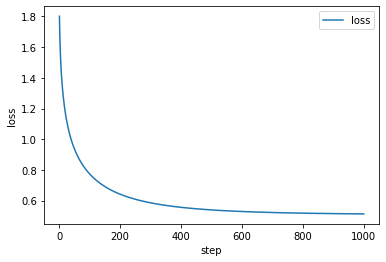

In [ ]:
model.loss_plot()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_test = label_encoder.fit_transform(y_test)

In [ ]:
Accuracy = int((sum(model.predict(X_test) == Y_test)/Y_test.shape) * 100)
print(f"Accuracy is {Accuracy}%")

Accuracy is 86%


# Hypothesis

In [ ]:
def encode_feature(array):  
    encoder = preprocessing.LabelEncoder()
    encoder.fit(array)
    return encoder.transform(array), encoder

def decode_feature(encoder,array):
    return encoder.inverse_transform(array)

In [ ]:
### Hypothesis 1 : No dimension reduction. 

In [ ]:
h1_x= X_scale1.copy(deep=True)

In [ ]:
Y

array(['yn_question', 'yn_question', 'yn_question', ..., 'emphasis',
       'emphasis', 'emphasis'], dtype=object)

In [ ]:
### Hypothesis 2: Dropping highly correlated parameters.

In [ ]:
h2_x=X_scale1.copy(deep=True)

In [ ]:
y2=Y

In [ ]:
h2_x.corr()

,0x,0y,0z,1x,1y,1z,2x,2y,2z,3x,...,96z,97x,97y,97z,98x,98y,98z,99x,99y,99z
0x,1.000000,0.364267,0.245398,0.998351,0.364176,0.151067,0.998458,0.359606,0.265499,0.997983,...,0.513234,0.964041,0.418516,0.413581,0.961466,0.419264,0.263061,0.967327,0.419773,0.369413
0y,0.364267,1.000000,-0.141067,0.364654,0.999669,-0.096142,0.366052,0.999006,-0.043705,0.375534,...,-0.210125,0.227610,0.963235,-0.327224,0.236166,0.948670,-0.218244,0.273982,0.937262,-0.057450
0z,0.245398,-0.141067,1.000000,0.243903,-0.141132,0.533558,0.242880,-0.141543,0.459192,0.239900,...,0.472477,0.268232,-0.134709,0.436018,0.263697,-0.126397,0.256085,0.250999,-0.118498,0.298378
1x,0.998351,0.364654,0.243903,1.000000,0.364540,0.146343,0.999024,0.359788,0.261101,0.997408,...,0.511491,0.964528,0.420531,0.410874,0.961508,0.421706,0.257624,0.967184,0.422356,0.372266
1y,0.364176,0.999669,-0.141132,0.364540,1.000000,-0.096481,0.366197,0.999766,-0.044506,0.375990,...,-0.207010,0.225019,0.961536,-0.324275,0.233259,0.945946,-0.211067,0.271310,0.933517,-0.057138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98y,0.419264,0.948670,-0.126397,0.421706,0.945946,-0.088915,0.424514,0.940776,-0.057808,0.433042,...,-0.155975,0.303092,0.993766,-0.270266,0.305698,1.000000,-0.303825,0.335696,0.996421,0.052076
98z,0.263061,-0.218244,0.256085,0.257624,-0.211067,0.239488,0.255110,-0.203576,0.314516,0.252589,...,0.585558,0.277721,-0.284041,0.581576,0.282012,-0.303825,1.000000,0.280536,-0.315674,0.071436
99x,0.967327,0.273982,0.250999,0.967184,0.271310,0.160542,0.963014,0.265430,0.277402,0.957439,...,0.517013,0.995702,0.328081,0.434608,0.997213,0.335696,0.280536,1.000000,0.343083,0.349157
99y,0.419773,0.937262,-0.118498,0.422356,0.933517,-0.083481,0.424805,0.927541,-0.050120,0.432703,...,-0.150933,0.311583,0.986636,-0.264434,0.314538,0.996421,-0.315674,0.343083,1.000000,0.061419


In [ ]:
corr_matrix = h2_x.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
h2_x.drop(to_drop, axis=1, inplace=True)

In [ ]:
h2_x

,0x,0y,0z,1z,2z,3z,4z,5z,6z,7z,...,83z,84z,85z,86z,87z,90z,91z,95z,98z,99z
0,-0.459681,-1.419443,0.286532,0.354516,0.269333,0.138774,0.080845,0.278298,0.271694,0.260479,...,1.219575,-0.350569,0.251328,0.061087,0.323412,-0.281271,-0.145828,0.140788,0.472009,0.244740
1,-0.450302,-1.460319,0.401347,0.354516,0.269333,0.138774,0.080845,0.188653,0.271694,0.356672,...,1.187187,-0.350569,0.195231,0.061087,0.323412,-0.281271,0.302155,0.384254,0.697950,0.298092
2,-0.436307,-1.483843,0.401347,0.354516,0.269333,0.263311,0.195062,0.278298,0.341474,0.356672,...,1.187187,1.795724,0.363523,0.061087,0.323412,-0.157704,0.302155,0.384254,0.901298,0.394127
3,-0.433776,-1.503389,0.401347,0.354516,0.269333,0.138774,0.080845,0.278298,0.341474,0.356672,...,1.187187,1.852418,-0.130134,-0.093970,0.323412,-0.034137,0.433915,0.519512,0.810921,-2.342882
4,-0.377796,-1.541178,0.401347,0.354516,0.269333,0.263311,0.286436,0.278298,0.341474,0.356672,...,1.219575,1.795724,-0.130134,-0.093970,0.323412,-0.034137,0.302155,0.519512,0.810921,-2.342882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9872,0.112327,0.395817,-0.287539,-0.168730,-0.370478,-0.708080,-0.695833,-0.573331,-0.321437,-0.297444,...,-1.981454,-0.755530,-0.679888,-2.059526,-0.129017,-0.404837,-0.593811,-0.778970,-0.906235,-0.470185
9873,0.089920,0.400000,-0.471241,-0.308262,-0.455786,-0.708080,-0.695833,-0.573331,-0.321437,-0.374399,...,-1.981454,-0.755530,-0.635010,-2.059526,-0.189341,-0.404837,-0.593811,-0.887177,-0.906235,-0.512867
9874,0.088654,0.400618,-0.563093,-0.308262,-0.541094,-0.807710,-0.787207,-0.662977,-0.391217,-0.451354,...,-1.981454,-0.755530,-0.679888,-2.059526,-0.249665,-0.528404,-0.830979,-1.022435,-0.996612,-0.512867
9875,0.085379,0.405144,-0.379390,-4.314123,-0.711711,-1.206230,-4.762659,-0.662977,-0.460998,-0.451354,...,-1.981454,-0.755530,-0.635010,-0.472885,-4.312768,-0.528404,-0.830979,-1.022435,-0.996612,-0.555549


In [ ]:
# Hypothesis 3: PCA without dropping highly correlated parameters.

In [ ]:
h3_x= X_scale1.copy(deep=True)

In [ ]:
h3_x

,0x,0y,0z,1x,1y,1z,2x,2y,2z,3x,...,96z,97x,97y,97z,98x,98y,98z,99x,99y,99z
0,-0.459681,-1.419443,0.286532,-0.472308,-1.423189,0.354516,-0.483929,-1.411865,0.269333,-0.493446,...,0.223691,-0.328936,-1.470244,0.292345,-0.313341,-1.475261,0.472009,-0.342961,-1.467760,0.244740
1,-0.450302,-1.460319,0.401347,-0.463940,-1.466669,0.354516,-0.473710,-1.457300,0.269333,-0.485263,...,0.363331,-0.269799,-1.600185,0.292345,-0.252894,-1.590944,0.697950,-0.292991,-1.567339,0.298092
2,-0.436307,-1.483843,0.401347,-0.450610,-1.494058,0.354516,-0.459815,-1.488089,0.269333,-0.472695,...,0.363331,-0.226710,-1.683207,0.424045,-0.208007,-1.656223,0.901298,-0.256124,-1.616963,0.394127
3,-0.433776,-1.503389,0.401347,-0.446907,-1.512820,0.354516,-0.455331,-1.506549,0.269333,-0.468238,...,0.363331,-0.212668,-1.720951,0.424045,-0.195869,-1.695311,0.810921,-0.247497,-1.657520,-2.342882
4,-0.377796,-1.541178,0.401347,-0.390699,-1.552877,0.354516,-0.399163,-1.548850,0.269333,-0.414532,...,0.363331,-0.123683,-1.747208,0.529405,-0.109434,-1.707972,0.810921,-0.170752,-1.658839,-2.342882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9872,0.112327,0.395817,-0.287539,0.159905,0.399149,-0.168730,0.191700,0.386165,-0.370478,0.231101,...,-0.977215,-0.035419,0.248301,-1.077331,-0.032042,0.278420,-0.906235,0.003493,0.285260,-0.470185
9873,0.089920,0.400000,-0.471241,0.135911,0.405585,-0.308262,0.168248,0.393658,-0.455786,0.207865,...,-1.088928,-0.046572,0.234054,-1.182691,-0.041411,0.259192,-0.906235,-0.002367,0.261932,-0.512867
9874,0.088654,0.400618,-0.563093,0.134430,0.406202,-0.308262,0.166630,0.394407,-0.541094,0.206111,...,-1.088928,-0.047295,0.232711,-1.314391,-0.041736,0.257689,-0.996612,-0.002367,0.260283,-0.512867
9875,0.085379,0.405144,-0.379390,0.130357,0.411542,-4.314123,0.164645,0.401083,-0.711711,0.205746,...,-1.088928,-0.059411,0.233755,-1.314391,-0.053712,0.251121,-0.996612,-0.010668,0.249155,-0.555549


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
principalComponents = pca.fit_transform(h3_x)
principalDf = pd.DataFrame(data = principalComponents, coloumn)

In [ ]:
principalDf.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03,...,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03,9.877000e+03
mean,2.439636e-16,4.505188e-15,1.956744e-16,1.467446e-16,-1.464214e-16,-7.505049e-16,9.390304e-16,4.524184e-16,-2.238824e-17,2.553839e-16,...,-3.193142e-17,-5.488098e-17,-1.183623e-17,3.994870e-17,1.660220e-17,-2.242758e-17,-8.992391e-18,-7.348188e-17,2.807874e-17,-5.258862e-17
std,1.180842e+01,9.773942e+00,4.851366e+00,2.614548e+00,1.904115e+00,1.831902e+00,1.535839e+00,1.372782e+00,1.198831e+00,1.173460e+00,...,4.457614e-01,4.401496e-01,4.305433e-01,4.148191e-01,4.106131e-01,4.004948e-01,3.921244e-01,3.824216e-01,3.697048e-01,3.553016e-01
min,-2.662304e+01,-2.077211e+01,-1.717974e+01,-7.538653e+00,-8.706553e+00,-5.255332e+00,-4.608212e+00,-4.824317e+00,-8.810501e+00,-5.530175e+00,...,-2.916350e+00,-3.092115e+00,-2.542709e+00,-2.192346e+00,-3.548411e+00,-3.242552e+00,-2.861211e+00,-3.946241e+00,-2.672366e+00,-2.674768e+00
25%,-1.203055e+01,-6.752623e+00,-3.201775e+00,-1.744704e+00,-8.202952e-01,-1.018219e+00,-8.786322e-01,-7.333540e-01,-6.549319e-01,-5.981097e-01,...,-2.101176e-01,-1.490028e-01,-2.396624e-01,-1.655576e-01,-1.517354e-01,-1.612813e-01,-1.765982e-01,-1.352592e-01,-1.479153e-01,-1.434979e-01
50%,2.124949e+00,-1.407951e+00,-4.902543e-01,-4.211084e-01,2.904782e-01,-1.703161e-01,-4.912667e-02,-1.265732e-01,5.996638e-02,-9.093295e-02,...,2.272630e-03,3.685086e-03,-1.808872e-02,-1.597558e-02,6.569975e-03,5.633969e-03,-8.713444e-04,1.149305e-03,-1.072301e-02,-2.055085e-03
75%,1.047446e+01,4.301040e+00,2.489983e+00,9.946972e-01,1.073046e+00,8.299502e-01,6.818851e-01,5.980076e-01,5.815492e-01,4.471611e-01,...,2.003008e-01,1.715560e-01,2.274005e-01,1.314242e-01,1.667520e-01,1.645154e-01,1.667638e-01,1.345516e-01,1.349250e-01,1.450406e-01
max,3.220408e+01,3.618652e+01,2.108513e+01,1.347551e+01,1.424348e+01,1.124127e+01,9.259425e+00,9.750102e+00,1.010075e+01,6.625202e+00,...,3.506985e+00,3.221777e+00,2.766288e+00,3.164733e+00,3.726915e+00,3.322991e+00,5.210473e+00,4.389565e+00,3.323932e+00,3.529157e+00


In [ ]:
principalDf

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,-12.139160,-7.846016,2.375109,-1.140718,0.374295,-0.742656,0.064344,-0.559647,0.392079,-0.369103,...,-0.131073,-0.059330,-0.287411,0.078690,0.045032,0.002585,0.040927,0.099599,0.210581,0.104677
1,-12.279306,-8.664925,2.163325,-1.172324,0.266586,-0.855806,-0.249921,-0.613283,0.451725,-0.239734,...,-0.264501,-0.123556,-0.195100,0.208586,0.011824,0.142656,-0.047610,-0.004332,0.024264,0.142023
2,-12.376718,-9.284260,2.014923,-0.801202,0.085622,-1.150111,-0.323866,-0.836700,0.640370,-0.079671,...,-0.002063,-0.018102,-0.195390,-0.025142,0.056965,0.260620,0.228329,0.049108,0.000392,-0.005854
3,-12.525091,-9.400850,2.095914,-1.151723,-0.456924,-1.601673,-0.801304,-0.691104,-0.004557,0.156983,...,0.189439,-0.025846,-0.240254,-0.172444,-0.049908,0.510092,0.108650,-0.033500,0.082589,0.084948
4,-12.388610,-9.956313,2.331983,-1.054951,-0.490189,-1.608657,-0.947903,-0.705942,-0.093958,0.088719,...,0.120933,-0.048906,-0.252186,-0.159422,0.005575,0.598534,0.117197,-0.060778,0.136853,-0.015823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9872,1.331050,10.866643,6.825344,-0.817697,2.263329,1.483909,-2.114549,-0.342465,-1.133503,0.830921,...,-0.360816,-0.247941,-0.726620,1.620306,-0.251858,0.267527,-0.420576,-0.161876,0.589479,-0.226080
9873,1.073970,11.356577,7.238074,-0.550512,2.222859,1.334607,-2.000438,-0.477813,-1.166277,0.520579,...,-0.399322,-0.174477,-0.765130,1.572063,-0.297586,0.221368,-0.550071,-0.161479,0.587579,-0.020392
9874,0.909081,12.200120,8.074291,-0.675271,2.354949,1.504786,-1.902732,-0.601787,-1.210941,0.747851,...,-0.397129,-0.200291,-0.828316,1.521162,-0.141023,0.071141,-0.418604,-0.031393,0.327390,-0.252425
9875,0.916762,12.840162,8.873955,0.071046,0.404304,3.627694,-2.099005,-1.539681,0.243109,2.959633,...,-0.076453,-0.735781,-0.357363,1.341365,-0.384643,0.216641,-0.215737,-0.131775,-0.272963,0.792964


In [ ]:
#Gaussian Naive Bayes
#GNB(principalDf,y3)

In [ ]:
#MultiClass Classification
#Performing the train test split for the Principal DF and the labels as well. 

PDF_train, PDF_test, y_train, y_test = train_test_split(principalDf, Y, test_size= 0.25, random_state = 0)
print(PDF_train.shape)
print(y_train.shape)

(7407, 53)
(7407,)


In [ ]:
y_pred = model.fit(PDF_train,y_train)

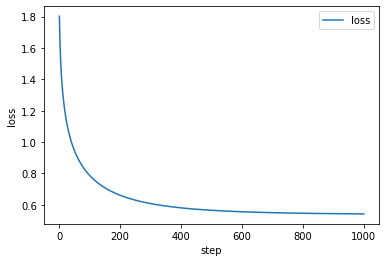

In [ ]:
#model.loss_plot()

In [ ]:
Accuracy = int((sum(model.predict(X_test) == Y_test)/Y_test.shape) * 100)
print(f"Accuracy is {Accuracy}%")

In [ ]:
#build_tree(h3_x, y3)

In [ ]:
#XGB(principalDf,y3)

In [ ]:
### Hypothesis 4 : PCA after dropping highly correlated parameters. 

In [ ]:
h4_x= X_scale1.copy(deep=True)

In [ ]:
Y

array(['yn_question', 'yn_question', 'yn_question', ..., 'emphasis',
       'emphasis', 'emphasis'], dtype=object)

In [ ]:
corr_matrix = h4_x.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
h4_x.drop(to_drop, axis=1, inplace=True)

In [ ]:
h4_x

,0,1,2,5,8,11,14,17,20,23,...,251,254,257,260,263,272,275,287,296,299
0,-0.459681,-1.419443,0.286532,0.354516,0.269333,0.138774,0.080845,0.278298,0.271694,0.260479,...,1.219575,-0.350569,0.251328,0.061087,0.323412,-0.281271,-0.145828,0.140788,0.472009,0.244740
1,-0.450302,-1.460319,0.401347,0.354516,0.269333,0.138774,0.080845,0.188653,0.271694,0.356672,...,1.187187,-0.350569,0.195231,0.061087,0.323412,-0.281271,0.302155,0.384254,0.697950,0.298092
2,-0.436307,-1.483843,0.401347,0.354516,0.269333,0.263311,0.195062,0.278298,0.341474,0.356672,...,1.187187,1.795724,0.363523,0.061087,0.323412,-0.157704,0.302155,0.384254,0.901298,0.394127
3,-0.433776,-1.503389,0.401347,0.354516,0.269333,0.138774,0.080845,0.278298,0.341474,0.356672,...,1.187187,1.852418,-0.130134,-0.093970,0.323412,-0.034137,0.433915,0.519512,0.810921,-2.342882
4,-0.377796,-1.541178,0.401347,0.354516,0.269333,0.263311,0.286436,0.278298,0.341474,0.356672,...,1.219575,1.795724,-0.130134,-0.093970,0.323412,-0.034137,0.302155,0.519512,0.810921,-2.342882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9872,0.112327,0.395817,-0.287539,-0.168730,-0.370478,-0.708080,-0.695833,-0.573331,-0.321437,-0.297444,...,-1.981454,-0.755530,-0.679888,-2.059526,-0.129017,-0.404837,-0.593811,-0.778970,-0.906235,-0.470185
9873,0.089920,0.400000,-0.471241,-0.308262,-0.455786,-0.708080,-0.695833,-0.573331,-0.321437,-0.374399,...,-1.981454,-0.755530,-0.635010,-2.059526,-0.189341,-0.404837,-0.593811,-0.887177,-0.906235,-0.512867
9874,0.088654,0.400618,-0.563093,-0.308262,-0.541094,-0.807710,-0.787207,-0.662977,-0.391217,-0.451354,...,-1.981454,-0.755530,-0.679888,-2.059526,-0.249665,-0.528404,-0.830979,-1.022435,-0.996612,-0.512867
9875,0.085379,0.405144,-0.379390,-4.314123,-0.711711,-1.206230,-4.762659,-0.662977,-0.460998,-0.451354,...,-1.981454,-0.755530,-0.635010,-0.472885,-4.312768,-0.528404,-0.830979,-1.022435,-0.996612,-0.555549


In [ ]:
#PCA highly correlated 
pca = PCA(n_components=0.99)
principalComponents = pca.fit_transform(h4_x)
principalDf_h4 = pd.DataFrame(data = principalComponents)

In [ ]:
principalDf_h4

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,-1.948559,-1.950169,-0.376499,-1.016195,0.082732,1.024612,0.204011,0.642072,0.549919,0.299485,...,0.155039,-0.029692,0.019310,-0.152128,-0.101229,-0.029300,-0.068265,0.043784,-0.009386,0.121494
1,-2.502288,-2.089480,-0.538985,-1.012745,0.188873,0.994800,0.152116,0.589057,0.613475,0.153464,...,0.248416,-0.109291,-0.083289,-0.151452,-0.089543,-0.056279,-0.143575,-0.000047,-0.056211,0.173589
2,-2.969004,-2.726729,-0.518531,-0.877870,0.258735,0.765791,0.321289,0.461437,0.879428,0.729506,...,0.169785,-0.044034,-0.037045,-0.123201,0.011792,-0.074766,-0.231085,-0.042084,-0.028260,0.220643
3,-2.834713,-2.749839,-1.321087,-1.446043,-0.135056,0.618235,0.505538,-0.009242,0.575188,0.928637,...,0.160869,-0.057029,-0.138127,-0.098842,-0.129307,-0.289100,-0.077311,-0.049896,0.082608,0.290055
4,-3.068770,-2.820492,-1.388388,-1.432288,-0.167081,0.558290,0.503801,0.014943,0.541466,0.824315,...,0.165023,0.002148,-0.213311,-0.025184,-0.110717,-0.399632,-0.109743,-0.152526,0.044222,0.206049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9872,8.435844,2.527305,0.987876,-0.824978,-0.748139,1.103724,-0.835035,-0.604589,-0.590330,0.350584,...,0.530312,-0.791268,-0.400670,0.151026,0.127602,-0.230364,0.255804,0.411478,-0.418981,-0.050924
9873,8.740220,2.252859,1.065542,-0.701698,-0.694662,0.929780,-0.663999,-0.351903,-0.413811,0.081544,...,0.368667,-0.785747,-0.350649,0.126205,0.145883,-0.193385,0.155685,0.550881,-0.190258,-0.054496
9874,9.590934,2.536909,1.091230,-0.659413,-0.697857,1.076488,-0.677150,-0.456795,-0.313615,0.319476,...,0.345426,-0.749058,-0.154901,0.271693,0.183441,-0.331296,0.103233,0.221911,-0.349560,-0.140791
9875,11.325339,1.575965,0.229642,2.153331,-0.397357,2.993386,-1.628266,-2.358112,-0.984108,1.951231,...,0.565355,0.922071,0.394068,-0.106760,-0.170981,-0.046668,-0.265425,-0.054633,0.378382,0.123840


In [ ]:
### REJECT HYPOTHESIS 4

In [ ]:
### Hypothesis 5 : Removing Boundary points.

In [ ]:
h5_x= X_scale1.copy(deep=True)

In [ ]:
Y

array(['yn_question', 'yn_question', 'yn_question', ..., 'emphasis',
       'emphasis', 'emphasis'], dtype=object)

In [ ]:
h5_x.drop(h5_x.iloc[:,201:258], inplace = True, axis = 1)

In [ ]:
h5_x.shape


(9877, 243)

In [ ]:
# Rejecting Hypothesis 5 because the number of parameter is more, but still accuracy is dropping 

In [ ]:
### Hypothesis 6 : Removing Boundary points and dropping highly correlated columns. 

In [ ]:
h6_x= h5_x.copy(deep=True)

In [ ]:
y6=y

In [ ]:
corr_matrix = h6_x.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
h6_x.drop(to_drop, axis=1, inplace=True)

In [ ]:
h6_x

h6_x_train, h6_x_test, y_train, y_test = train_test_split(principalDf, Y, test_size= 0.25, random_state = 0)
print(h6_x_train.shape)
print(y_train.shape)

(7407, 54)
(7407,)


In [ ]:
y_pred = model.fit(h6_x_train, y_train)

In [ ]:
print(h6_x_test.shape)
print(y_test.shape)

(2470, 54)
(2470,)


In [ ]:
Accuracy = int((sum(model.predict(h6_x_test) == y_test)/y_test.shape) * 100)
print(f"Accuracy is {Accuracy}%")

ValueError: ignored

In [ ]:
### REJECT HYPOTHESIS 6

In [ ]:
# Hypothesis 7: Removing boundary points and performing PCA without dropping highly correlated parameters.

In [ ]:
h7_x= h5_x.copy(deep=True)

In [ ]:
y7=y

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
principalComponents = pca.fit_transform(h7_x)
principalDf_h7 = pd.DataFrame(data = principalComponents)

In [ ]:
### Hypothesis 8 : Removing boundary points and performing PCA after dropping highly correlated parameters. 

In [ ]:
h8_x= h6_x.copy(deep=True)

In [ ]:
y8=y

In [ ]:
pca = PCA(n_components=0.99)
principalComponents = pca.fit_transform(h8_x)
principalDf = pd.DataFrame(data = principalComponents)

In [ ]:
principalDf

In [ ]:
### REJECT HYPOTHESIS 8

In [ ]:
### Hypothesis 9 : Converting to 2D

In [ ]:
h9_x = X_scale1.copy(deep=True)

In [ ]:
y9=y

In [ ]:
h9_x.drop(h9_x.iloc[:,2::3], inplace = True, axis = 1)

In [ ]:
h9_x

In [ ]:
### REJECT HYPOTHESIS 9

In [ ]:
### Hypothesis 10 : Removing the Boundary Points and converting to 2D

In [ ]:
h10_x= h5_x.copy(deep=True)

In [ ]:
y10=y

In [ ]:
h10_x.drop(h10_x.iloc[:,2::3], inplace = True, axis = 1)

In [ ]:
h10_x

In [ ]:
### REJECT HYPOTHESIS 10

In [ ]:
### Removing Boundary points or removing the Z coordinate will reduce the performance of the models. This indicates
### that both are important for classifying expressions of the face.

In [ ]:
### Hypothesis in consideration h1, h2, h3 and h4.

In [ ]:
### Hypothesis 4 increases the runtime as well as reduces the performance of the model.

In [ ]:
### Hypothesis in consideration h1, h2 and h3.

In [ ]:
#1 Dropping the boundary points for train_0 -> scale0
m7_X0 = X_scale0.copy(deep=True)
m7_X0.drop(m7_X0.iloc[:,201:258], inplace = True, axis = 1)

In [ ]:
pca = PCA(n_components=0.99)
principalComponents = pca.fit(h7_x)
principalComponents = principalComponents.transform(m7_X0)
principalDf = pd.DataFrame(data = principalComponents)

In [ ]:
principalDf

In [ ]:
m7_y0 = h7_model.predict(principalDf)
len(m7_y0)

In [ ]:
principalDf['Target'] = decode_feature(h7_encoder,m7_y0)

In [ ]:
principalDf_h7['Target'] = y.values

In [ ]:
principalDf_h7 = pd.concat([principalDf_h7,principalDf], axis=0)

In [ ]:
principalDf_h7

In [ ]:
# Hence all the records have been labeled and is ready to be used for recommendation system 

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_test = label_encoder.fit_transform(y_test)